# Diabetes Prediction Problem


The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Import the libraries
Import Necessary Libraries To ensure the necessary libraries are installed correctly and up-to-date, print the version numbers for each library. This will also improve the reproducibility of our project.

In [61]:
import sys    #for python version
import sklearn
import pandas
import numpy
import seaborn
import matplotlib

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scikit-learn: 0.22.1
Pandas: 1.0.1
Numpy: 1.18.1
seaborn: 0.10.0
matplotlib: 3.1.3


# Exploratory data analysis

### Import libraries for EDA

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns


# To ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

## Load the dataset

In [63]:
#import the dataset from the location
df_Train=pd.read_csv('diabetes.csv')

In [64]:
df_Train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
df_Train.shape

(768, 9)

## All about data

- <b>Pregnancies</b>--->Number of times pregnant
- <b>Glucose</b>---->Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- <b>BloodPressure</b>--->Diastolic blood pressure (mm Hg)
- <b>SkinThickness</b>--->Triceps skin fold thickness (mm)
- <b>Insulin</b>---->2-Hour serum insulin (mu U/ml)
- <b>BMI</b>---->Body mass index (weight in kg/(height in m)^2)
- <b>DiabetesPedigreeFunction</b>---->Diabetes pedigree function
- <b>Age</b>---->Age (years)
- <b>Outcome</b>--->Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [66]:
#shape of dataset with rows and columns
print("Input data has {} rows and {} col".format(len(df_Train),len(df_Train.columns)))

Input data has 768 rows and 9 col


In [67]:
#preview of the data
print(df_Train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [68]:
# Descriptive measures of data
df_Train.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* <b>count</b> is the total number of non null obervations in each column.
* <b>mean</b> is the mean value of all non null observations in each column.
* <b>std</b> is the standard deviation (i.e. measure of variation).
* <b>min,25%,50%,75% and max</b> are obtained after sorting each column in ascending order.
    * <b>min:</b> the smallest value
    * <b>25%</b> the first quartile value
    * <b>50%</b> the second quartile value
    * <b>max</b> the largest value

## Missing values

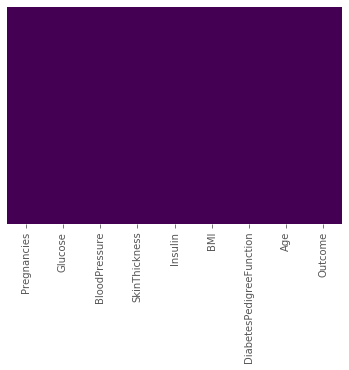

In [69]:
#check for null values in dataset
sns.heatmap(df_Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the above heatmap we can come to know we have no null values in the dataset

But in the dataset we have Zeros in each columns this can also affect the outcome of the prediction so we can impute this by using mean stragery.

## Checking Imbalanced dataset are not

In [70]:
diabetes_true_count = len(df_Train.loc[df_Train['Outcome'] == True])
diabetes_false_count = len(df_Train.loc[df_Train['Outcome'] == False])

In [71]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

From the count we can see it is not imbalanced data there is enough data to predict the outcome.

## Correlation

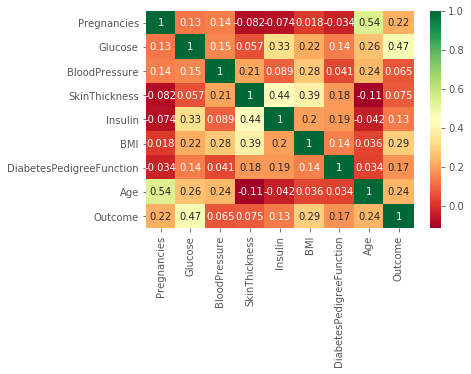

In [72]:
sns.heatmap(df_Train.corr(),annot=True,cmap="RdYlGn")

In [73]:
df_Train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


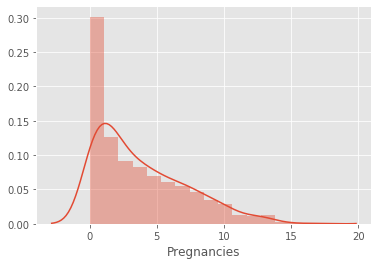

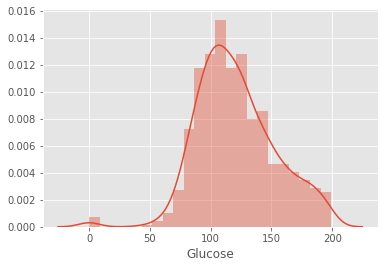

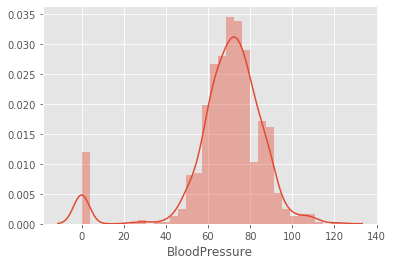

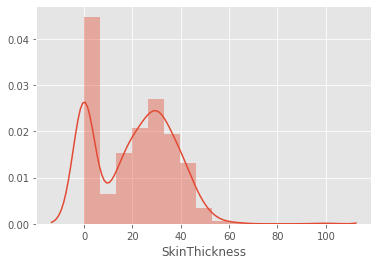

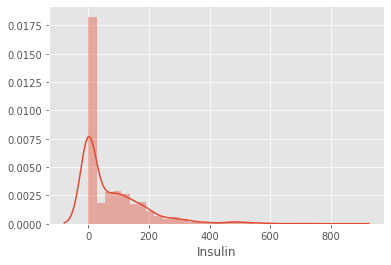

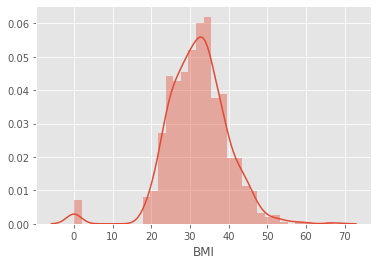

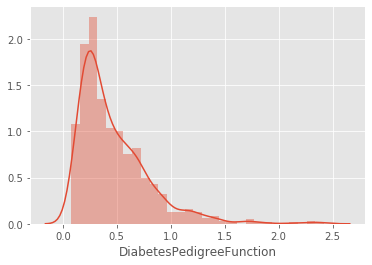

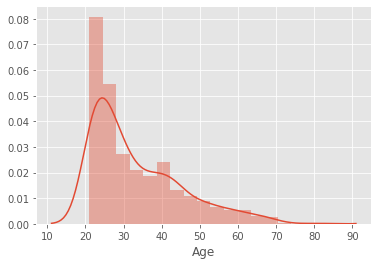

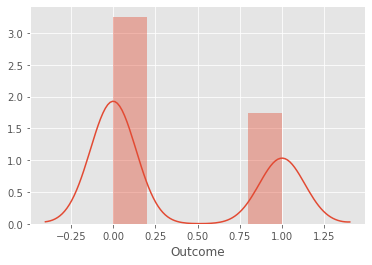

In [76]:
data = df_Train.columns

for feature in data:
    p=sns.distplot(a = df_Train[feature])
    plt.show()

# Handling Zeros in the datset

In [47]:
print("number of rows missing Glucose: {0}".format(len(df_Train.loc[df_Train['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df_Train.loc[df_Train['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df_Train.loc[df_Train['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(df_Train.loc[df_Train['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(df_Train.loc[df_Train['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(df_Train.loc[df_Train['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(df_Train.loc[df_Train['Age'] == 0])))

number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0


In [82]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [83]:
df_Train[data_zeros] = np.where((df_Train[data_zeros] == 0), np.nan, df_Train[data_zeros])

In [84]:
df_Train['Glucose'] = df_Train['Glucose'].fillna(df_Train['Glucose'].median())
df_Train['BloodPressure'] = df_Train['BloodPressure'].fillna(df_Train['BloodPressure'].median())
df_Train['SkinThickness'] = df_Train['SkinThickness'].fillna(df_Train['SkinThickness'].median())
df_Train['Insulin'] = df_Train['Insulin'].fillna(df_Train['Insulin'].median())
df_Train['BMI'] = df_Train['BMI'].fillna(df_Train['BMI'].median())

In [85]:
df_Train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


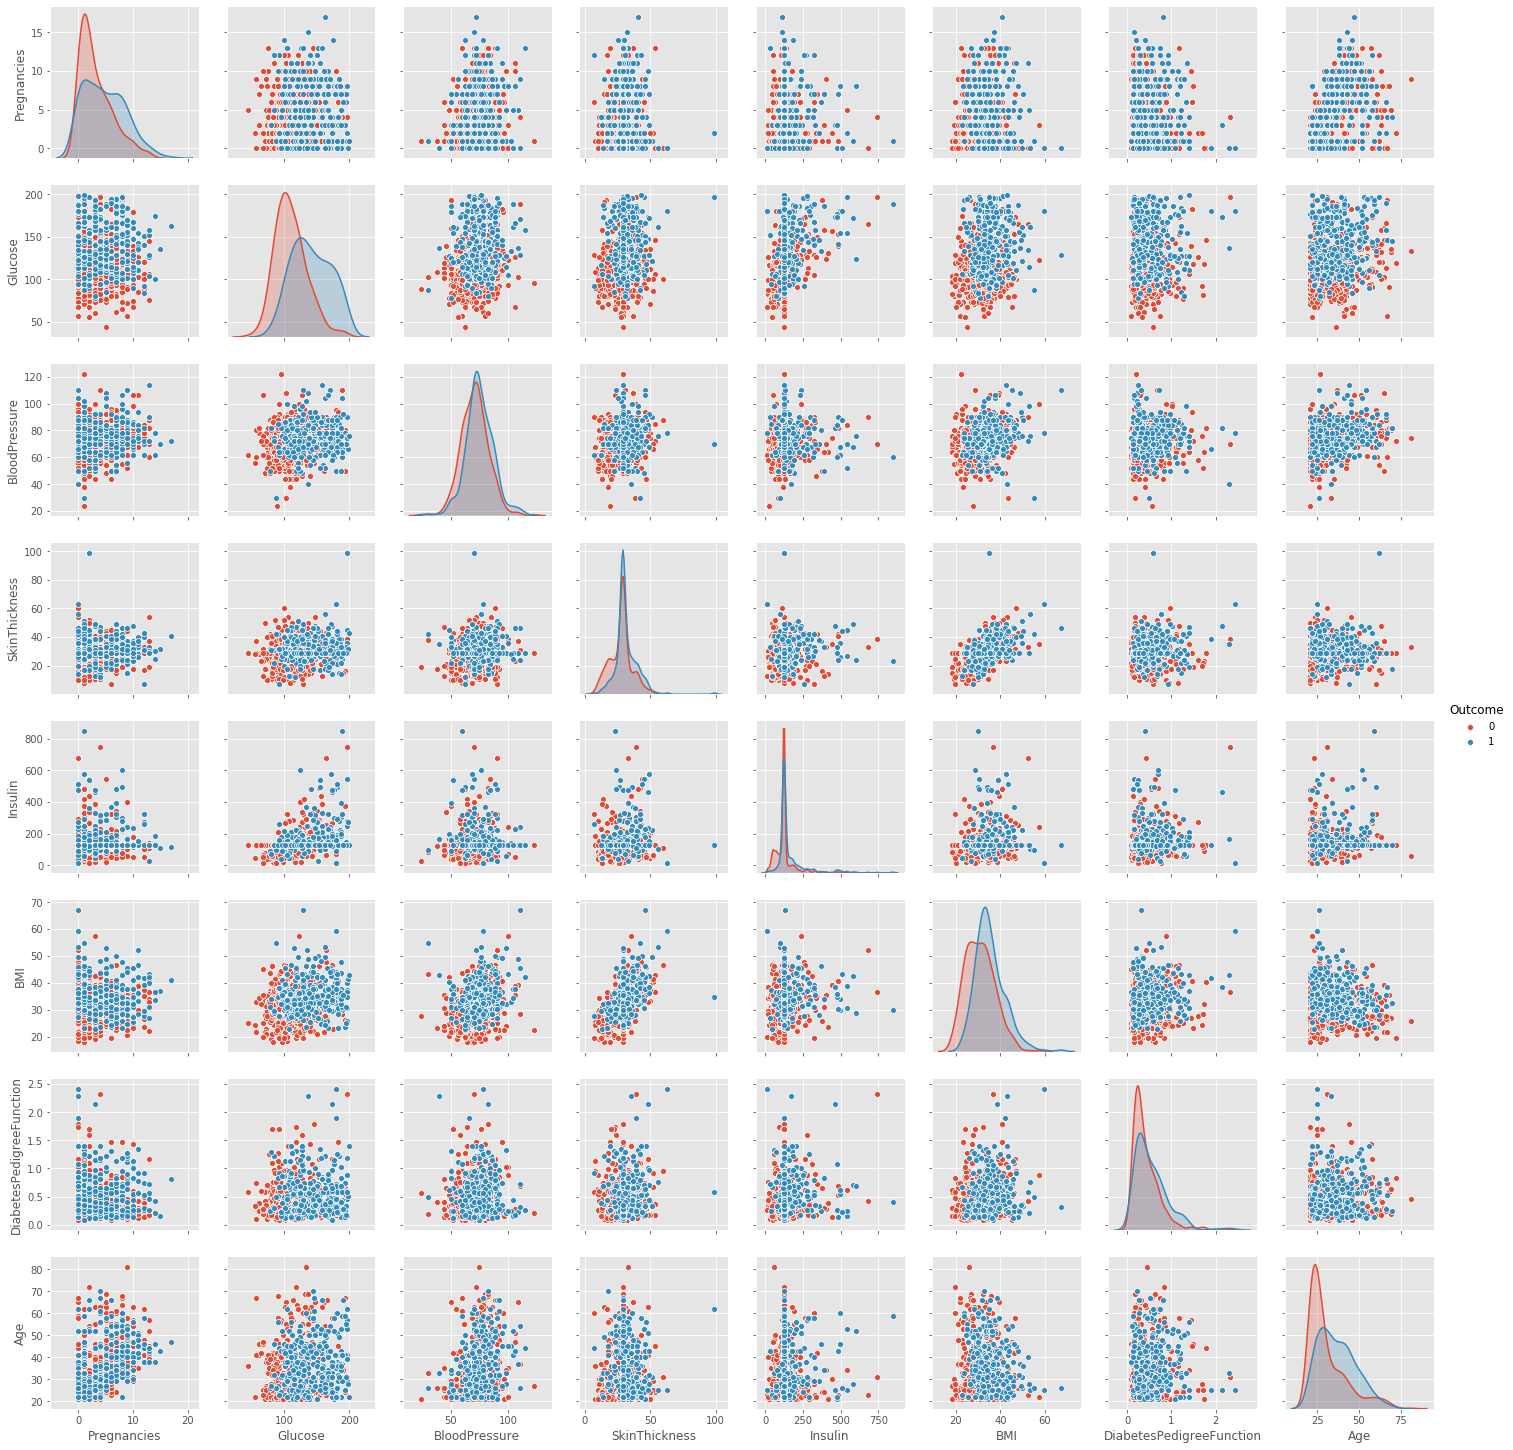

In [86]:
sns.pairplot(data =df_Train, hue = 'Outcome')
plt.show()

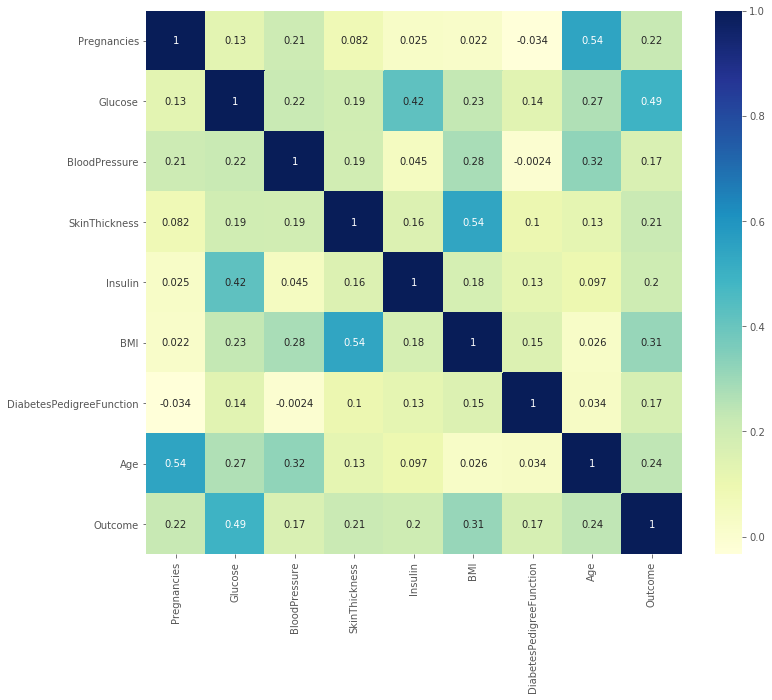

In [87]:
plt.figure(figsize=(12,10))
sns.heatmap(df_Train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

## Standardizing the data

In [88]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [90]:
X = df_Train.iloc[:, :-1]
y = df_Train.iloc[:, -1]

## Spliting the data

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [92]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Model Building

In [93]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
import xgboost as xgb
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score #for confusion matrix

## Logistic Regression

In [94]:
#we need to fit and predict the model
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
Cross_score=cross_val_score(lr, X, y, cv = 10,scoring='accuracy').mean() * 100

In [95]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, y_pred))

** confusion_matrix **
[[97 10]
 [19 28]]
** Accuracy_Score **
0.81
** Cross_score **
76.95146958304854
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



## SVC

In [96]:
#create a model and predict 
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
Cross_score=cross_val_score(svc, X, y, cv = 10,scoring='accuracy').mean() * 100

In [97]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, y_pred))

** confusion_matrix **
[[94 13]
 [21 26]]
** Accuracy_Score **
0.78
** Cross_score **
75.92105263157895
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.67      0.55      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



## Knn 

In [98]:
#create a model and predict
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
Cross_score=cross_val_score(knn, X, y, cv = 10,scoring='accuracy').mean() * 100

In [99]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test,knn_pred))

** confusion_matrix **
[[94 13]
 [21 26]]
** Accuracy_Score **
0.78
** Cross_score **
71.61483253588517
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.63      0.66      0.65        47

    accuracy                           0.78       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.78      0.78      0.78       154



## Navie Bayes

In [100]:
#create a model and predict
NB = GaussianNB()
NB.fit(X_train,y_train)
NB_pred = NB.predict(X_test)
Cross_score=cross_val_score(NB, X, y, cv = 10,scoring='accuracy').mean() * 100

In [101]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, NB_pred))

** confusion_matrix **
[[94 13]
 [21 26]]
** Accuracy_Score **
0.78
** Cross_score **
75.0
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



## Random Forest

In [102]:
#create a model and predict
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)
Rf_pred = Rf.predict(X_test)
Cross_score=cross_val_score(Rf, X, y, cv = 10,scoring='accuracy').mean() * 100

In [103]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, Rf_pred))

** confusion_matrix **
[[94 13]
 [21 26]]
** Accuracy_Score **
0.78
** Cross_score **
75.3879015721121
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



## Decision Tree

In [105]:
#create a model and predict
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
Cross_score=cross_val_score(dt, X, y, cv = 10,scoring='accuracy').mean() * 100

In [106]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, dt_pred))

** confusion_matrix **
[[94 13]
 [21 26]]
** Accuracy_Score **
0.78
** Cross_score **
69.02084757347914
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       107
           1       0.54      0.53      0.54        47

    accuracy                           0.72       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.72      0.72      0.72       154



## XGB Classifier

In [107]:
#create a model and predict
Xgb = xgb.XGBClassifier()
Xgb.fit(X_train,y_train)
Xgb_pred = Xgb.predict(X_test)
Cross_score=cross_val_score(Xgb, X, y, cv = 10,scoring='accuracy').mean() * 100

In [108]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, Xgb_pred))

** confusion_matrix **
[[94 13]
 [21 26]]
** Accuracy_Score **
0.78
** Cross_score **
76.30382775119617
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.70      0.74      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.83      0.82      0.83       154



## SGDClassifier

In [109]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
Cross_score=cross_val_score(sgd, X, y, cv = 10,scoring='accuracy').mean() * 100

In [110]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test,pred_sgd))

** confusion_matrix **
[[94 13]
 [21 26]]
** Accuracy_Score **
0.78
** Cross_score **
60.688653451811334
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       107
           1       0.62      0.66      0.64        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.78      0.77      0.77       154



## Hyperparameter tuning

## Logistic Regression

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [178]:
param={'penalty' : ['l1','l2'],
             'C' : np.logspace(-4, 4,10)}

In [179]:
grid_search = GridSearchCV(estimator=lr, param_grid=param, n_jobs=-1, cv=10, scoring='accuracy',verbose=1)

In [180]:
grid_result = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.7s finished


In [181]:
grid_search.best_params_

{'C': 2.782559402207126, 'penalty': 'l2'}

In [182]:
grid_search.best_score_

0.7572184029613961

In [183]:
pred = grid_search.predict(X_test)

In [184]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) * 100

81.16883116883116

In [177]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



## RandomForest Hyperparameter Tuning

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
Rf = RandomForestClassifier()

In [130]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [ 50, 100, 300],
    'max_features': ['auto', 'log2'],
 
    'max_depth' : [ 4, 6, 8, 10, None]    
}

In [131]:
randomF = GridSearchCV(estimator = Rf, param_grid = param_grid, cv = 10,verbose=1,n_jobs=-1)
randomF.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [133]:
randomF = RandomForestClassifier(random_state = 0, criterion = 'gini', max_depth = 4, max_features = 'log2', n_estimators = 300)

randomF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [134]:
predictions = randomF.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions) * 100

78.57142857142857

 From this analysis we can choose logistic regression as it is giving better results among all the models.